# Assignment #1

Author: Noah Bakayou

Collaborators: Dr. A (office hours)

Integrity Statement: Did you use an LLM to write any of the code in your assignment? (Y/N): N

# Instructions

You are permitted to work with a partner in the class to complete your assignment, but no more than one partner. However, every student must submit their own copy of the assignment, and must list your collaborators.

You should refer to your textbook and posted course materials as resources. You are also allowed to use the documentation for python, pandas, matplotlib, and seaborn. You may not use other online resources or LLMs for this assignment.

You will be graded based on (1) correctness, (2) completeness, (3) documentation, and (4) overall readability of your notebook. The assignment will be worth a total of 100 points in the Homework category (15% of your grade).

**Submission and Deadline: This assignment must be submitted on Canvas before class begins on Wednesday, September 17.**

You must complete all of the steps below:

1. Organize your project in a project folder (or repo) with three subfolders: src, data, and presentations. Place the provided dataset in the data folder, and the two provided notebooks in the src folder.
2. Use a python virtual environment, install the libraries you use, and create a requirements.txt file (using `pip freeze`)
3. Open and read through the provided data cleaning notebook to understand the cleaning process and all of its operations. (Fair game).
4. Run the separate notebook provided for cleaning the CDC data. It should create a new file. You do not need to edit that notebook at all, and only need to run it once. All coding will take place in this notebook.

The rest of the assignment should be completed in this notebook:

1. Read in the clean data in from the provided csv file and write code to examine it and understand it
2. Write code to determine which cancer site had the highest incidence of new cases for females in each individual year included in the dataset, and present your results
3. Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)
4. Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each individual cancer site (many lines)
5. Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females
6. Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000
7. For each cancer site and each year, determine whether males or females had the higher incidence (hint: groupby)
8. Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

9. Add your full name and the full names of your collaborator (if any) at the top of this document. Answer the integrity statement. 
10. Submit this notebook on Canvas together with the requirements.txt file

**NOTE:** For each plot, add a descriptive title and label the axes appropriately, and remark on any observations that you make.

**HINT #1:** Most problems can be solved by some combination of filtering and/or groupby before aggregating (e.g., taking the max) and plotting.

**HINT #2:** You can solve these problems in any order, so do the ones you find easiest first and the rest will start to feel easier.

**Useful Documentation**
- Pandas general documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Pandas dataframe reshaping: https://pandas.pydata.org/docs/user_guide/reshaping.html
- Pandas Copy-on-Write: https://pandas.pydata.org/docs/user_guide/copy_on_write.html
- Pandas missing data: https://pandas.pydata.org/docs/user_guide/missing_data.html
- Pandas split-apply-combine (groupby, agg): https://pandas.pydata.org/docs/user_guide/groupby.html 

- Matplotlib documentation: https://matplotlib.org/stable/plot_types/index.html
- Seaborn documentation: https://seaborn.pydata.org/


# Imports and CoW

In [3]:
#Uncomment the libraries you need. Be sure to install whichever ones you need into your Python virtual environment. You may also need to also install Jupyter or iPython to run your notebook, depending on your setup.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np


In [4]:
#pd.set_option('''Your code here to set Copy-on-Write''') # will be the default in pandas 3.0, best to enforce it
pd.set_option("mode.copy_on_write", True) # will be the default in pandas 3.0, best to enforce it

# 1. Read in Data

In [5]:
from pathlib import Path

cwd = Path().cwd() #should be our src folder, containing this notebook
project_folder = cwd.parent #should be our project folder, containing the src folder
dataset_path = Path('data/clean_cdc_cancer.csv') #using a data folder makes life easier

file = project_folder / dataset_path #join the project folder with the dataset path

if not file.exists():
    raise FileNotFoundError(f"Dataset file not found: {file}")
cancer = pd.read_csv(file)
cancer.head()

,Cancer Sites,Cancer Sites Code,Year,Sex,Count,Population,Age-Adjusted Rate,Age-Adjusted Rate Lower 95% Confidence Interval,Age-Adjusted Rate Upper 95% Confidence Interval,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval
0,All Invasive Cancer Sites Combined,0,1999,F,631741,140394214,420.5,419.4,421.5,450.0,448.9,451.1
1,All Invasive Cancer Sites Combined,0,1999,M,672530,135067134,572.4,571.0,573.8,497.9,496.7,499.1
2,All Invasive Cancer Sites Combined,0,2000,F,641968,141865770,421.3,420.3,422.4,452.5,451.4,453.6
3,All Invasive Cancer Sites Combined,0,2000,M,690598,136692444,577.0,575.6,578.3,505.2,504.0,506.4
4,All Invasive Cancer Sites Combined,0,2001,F,662313,143603977,427.6,426.6,428.7,461.2,460.1,462.3


# 2. Incidence for Females Each Year

Write code to determine which cancer site had the highest incidence of new cases for females in each year 1999-2022 (hint: filter then groupby then agg)

In [6]:
female_data = cancer[cancer["Sex"] == "F"]

# Remove unwanted cancer sites
female_data_filtered = female_data[female_data["Cancer Sites"] != "All Invasive Cancer Sites Combined"]
female_data_filtered = female_data_filtered[female_data_filtered["Cancer Sites"] != "Male and Female Breast"]

# Groupby year and cancer sites, then sum the count for each 
grouped = female_data_filtered.groupby(["Year", "Cancer Sites"])["Count"].sum()
#print(grouped)

# Find the index of the maximum count for each year
idx = grouped.groupby("Year").idxmax()

final = grouped[idx]

print(final)

Year  Cancer Sites 
1999  Female Breast    198589
2000  Female Breast    198710
2001  Female Breast    201357
2002  Female Breast    200584
2003  Female Breast    195513
2004  Female Breast    196651
2005  Female Breast    199812
2006  Female Breast    204445
2007  Female Breast    210783
2008  Female Breast    216685
2009  Female Breast    222326
2010  Female Breast    219250
2011  Female Breast    227410
2012  Female Breast    231092
2013  Female Breast    237889
2014  Female Breast    242376
2015  Female Breast    248727
2016  Female Breast    251441
2017  Female Breast    256815
2018  Female Breast    263598
2019  Female Breast    273771
2020  Female Breast    251851
2021  Female Breast    282273
2022  Female Breast    279731
Name: Count, dtype: int64


# 3. Line plots for male and female, all sites

Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)

<Axes: title={'center': 'Cancer Incidence for All Invasive Cancer Sites by Sex (1999-2022)'}, xlabel='Year', ylabel='Number of Cases'>

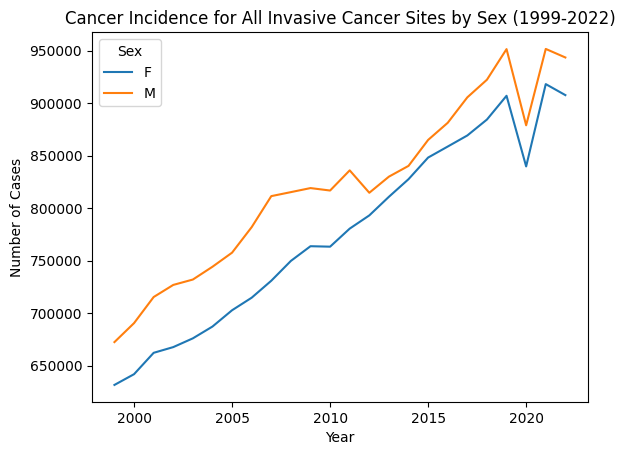

In [ ]:
#Filter for all sites data
all_sites_data = cancer[cancer["Cancer Sites"] == "All Invasive Cancer Sites Combined"]
grouped = all_sites_data.groupby(["Year", "Sex"])["Count"].sum()
#print(grouped)

#convert index back into columns
plot_data = grouped.reset_index()

plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Cancer Incidence for All Invasive Cancer Sites by Sex (1999-2022)")
sns.lineplot(data=plot_data, x="Year", y="Count", hue="Sex")


# 4. Line plots for cancer sites

 Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each cancer site (many lines)

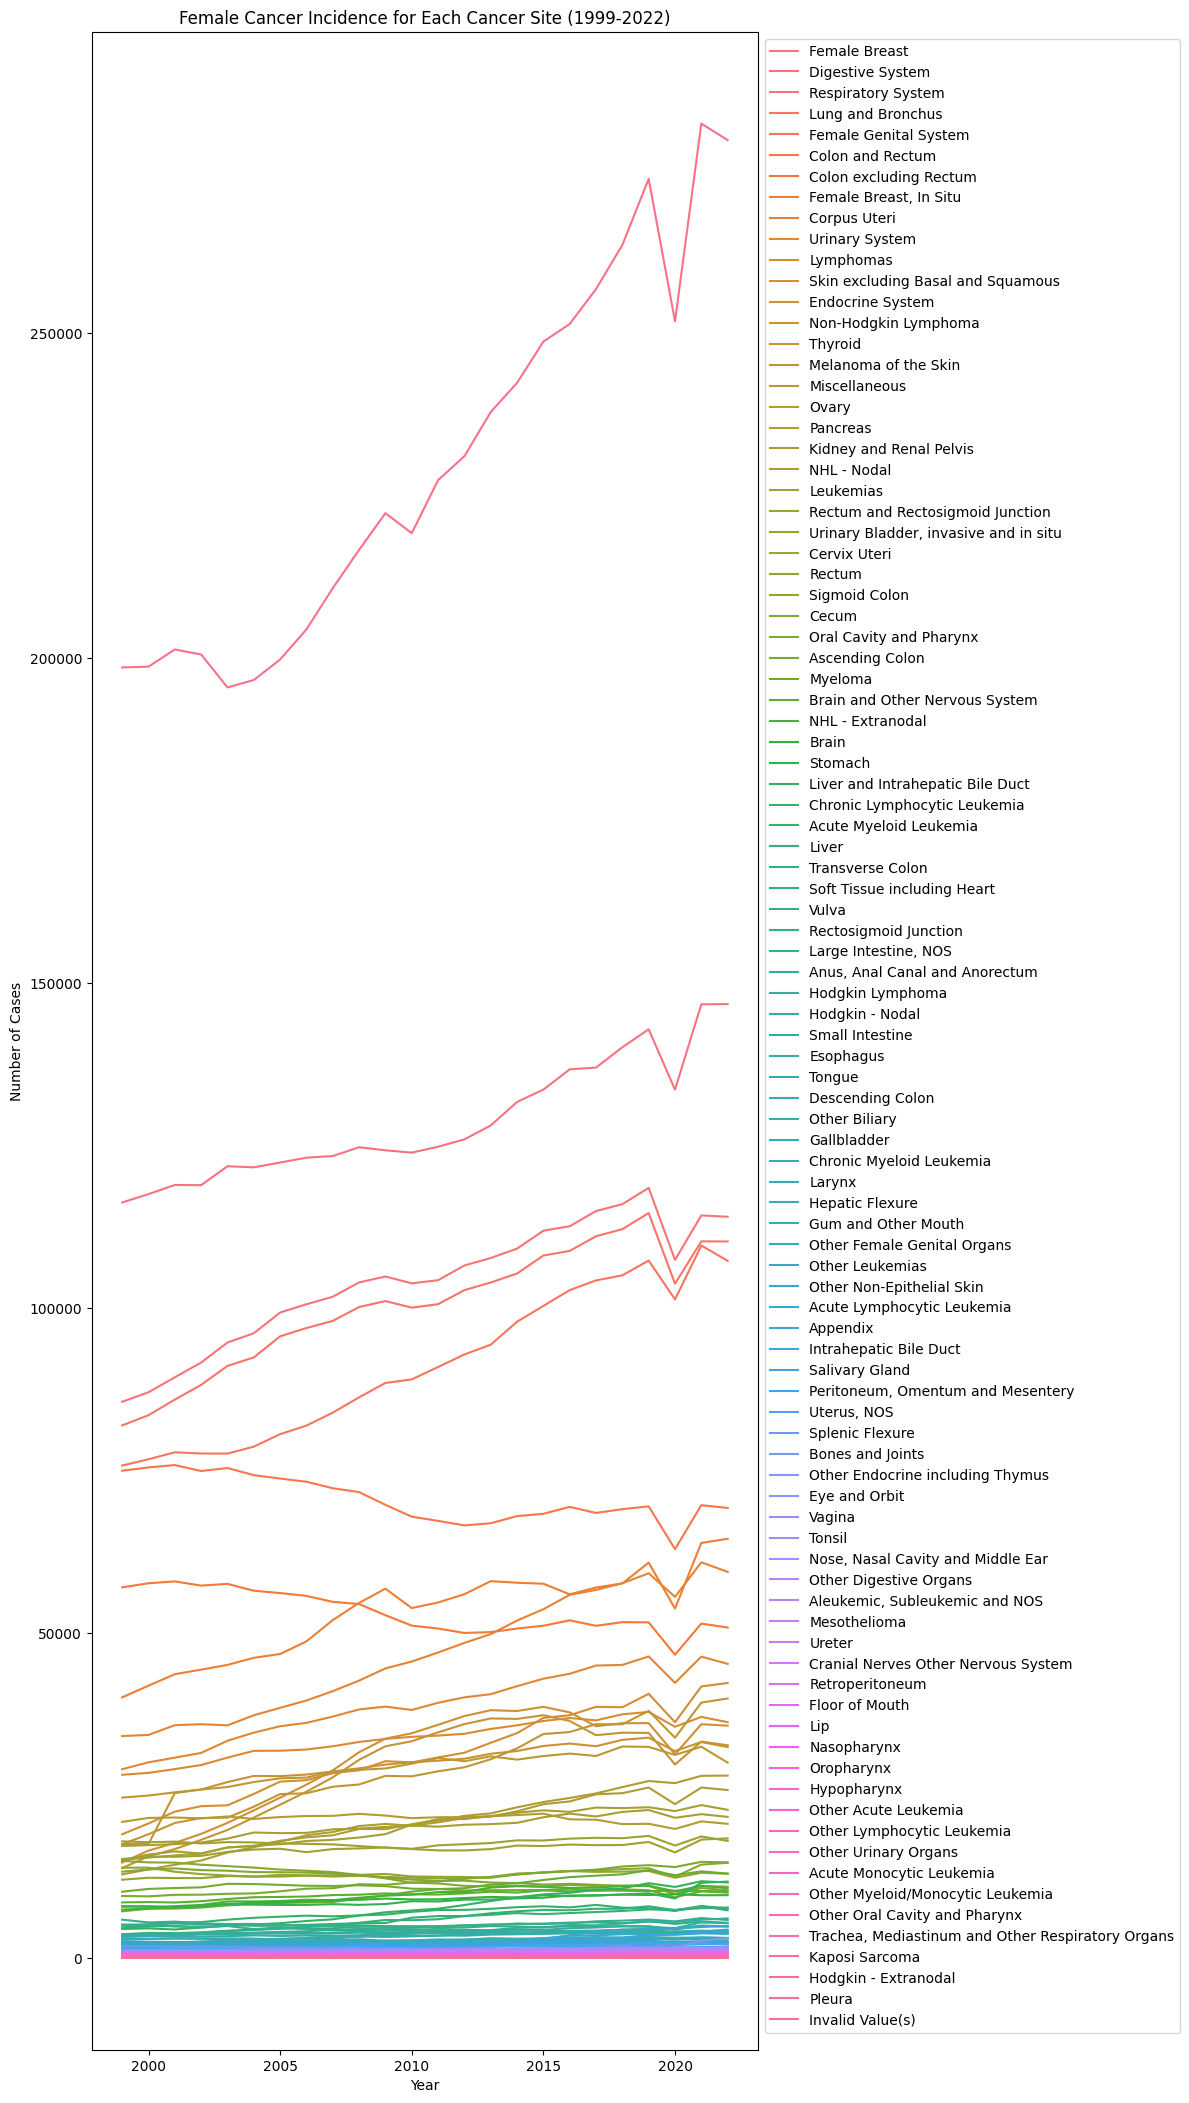

In [ ]:
female_data = cancer[cancer["Sex"] == "F"]
female_data_filtered = female_data[
    (female_data["Cancer Sites"] != "All Invasive Cancer Sites Combined") &
    (female_data["Cancer Sites"] != "Male and Female Breast") &
    (female_data["Cancer Sites"] != "Male and Female Breast, In Situ")
]

grouped = female_data_filtered.groupby(["Year", "Cancer Sites"])["Count"].sum()
plot_data = grouped.reset_index()

#Get total count for each cancer site so our key can organize from highest to lowest count
site_order = plot_data.groupby("Cancer Sites")["Count"].sum().sort_values(ascending=False).index
plot_data["Cancer Sites"]=pd.Categorical(plot_data["Cancer Sites"], categories=site_order)

#stretch vertically to seperate lines more
plt.figure(figsize=(12, 23))
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Female Cancer Incidence for Each Cancer Site (1999-2022)")
sns.lineplot(data=plot_data, x="Year", y="Count", hue="Cancer Sites")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# 5. Scatter plot for 2020

Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females

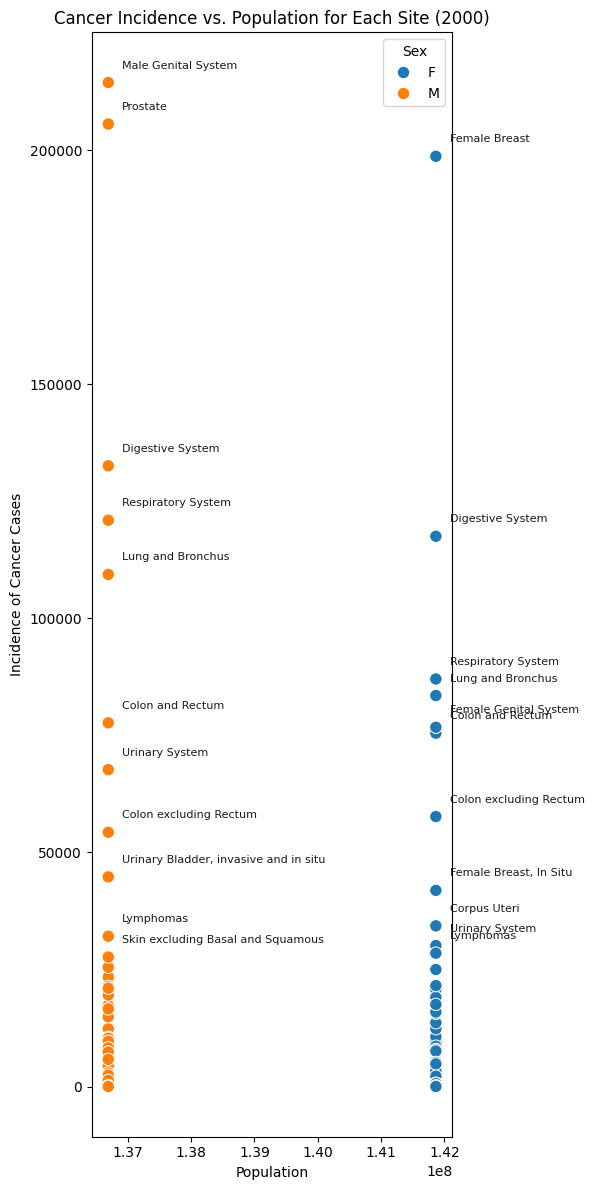

In [ ]:
# Filter data for the year 2000
data_filtered = cancer[
    (cancer["Cancer Sites"] != "All Invasive Cancer Sites Combined") &
    (cancer["Cancer Sites"] != "Male and Female Breast") &
    (cancer["Cancer Sites"] != "Male and Female Breast, In Situ")
]
data_2000 = data_filtered[data_filtered["Year"] == 2000]

plt.figure(figsize=(6, 12))
sns.scatterplot(data=data_2000, x="Population", y="Count", hue="Sex", s=80)

# Only label the top 10 highest incidence points...everything overlaps near the bottom
top_10 = data_2000.nlargest(22, 'Count')
for i, row in top_10.iterrows():
    plt.annotate(row['Cancer Sites'], 
                (row['Population'], row['Count']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=8, alpha=0.9)

plt.title("Cancer Incidence vs. Population for Each Site (2000)")
plt.xlabel("Population")
plt.ylabel("Incidence of Cancer Cases")
plt.tight_layout()

# 6. Bar plot for each site

Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000

# 7. Higher Incidence Between Sexes

For each cancer site and each year, determine whether males or females had the higher incidence

# 8. Pivot table for cancer / year

Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined